# Conditional Glyffuser Inference
This notebook calls down the trained glyffuser from huggingface and generates a grid with images after different sampling steps. Adjust the prompt in `texts` and the steps in `num_inference_steps_list`

100%|██████████| 20/20 [00:00<00:00, 30.68it/s]


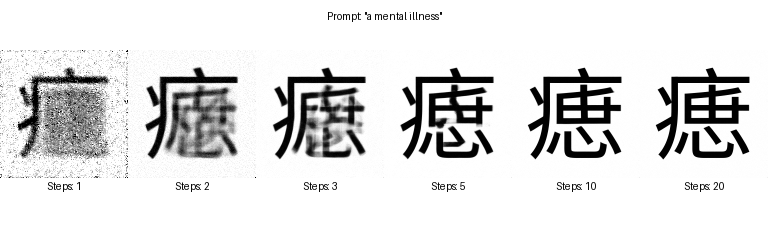

In [11]:
from diffusers import DPMSolverMultistepScheduler
from glyffuser_utils import GlyffuserPipeline, make_labeled_grid
import torch

# Initialize the model pipeline
pipeline = GlyffuserPipeline.from_pretrained("yuewu/glyffuser").to("cuda")
pipeline.scheduler = DPMSolverMultistepScheduler()

texts = ['a mental illness']  # Your text prompt
num_inference_steps_list = [1, 2, 3, 5, 10, 20]  # List of different num_inference_steps values

images = []

# Generate images for each value in num_inference_steps_list
for num_steps in num_inference_steps_list:
    generated_images = pipeline(
        texts,
        batch_size=1,  # Generate one image at a time for each step
        generator=torch.Generator(device='cuda').manual_seed(0),  # Generator can be on GPU here
        num_inference_steps=num_steps
    ).images
    images.append(generated_images[0])  # Append the generated image

# Create the labeled grid
image_grid = make_labeled_grid(images, texts[0], num_inference_steps_list, font_size=30, margin=20)
image_grid

# Save the image grid
# image_grid.save(f"inference example.png") # Uncomment to save